<a href="https://colab.research.google.com/github/VijayTaori/Ecommerce-Purchases-Exercise/blob/main/E_commerce_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas.util.testing as tm
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_excel('Online Retail Data Set.xlsx',sheet_name='Online Retail')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


<Figure size 600x300 with 0 Axes>

In [5]:
print('df.shape before dropping duplicates',df.shape)
df.drop_duplicates(inplace=True)
print('df.shape after dropping duplicates',df.shape)

df.shape before dropping duplicates (46431, 8)
df.shape after dropping duplicates (46341, 8)


In [6]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1465
Country           0
dtype: int64

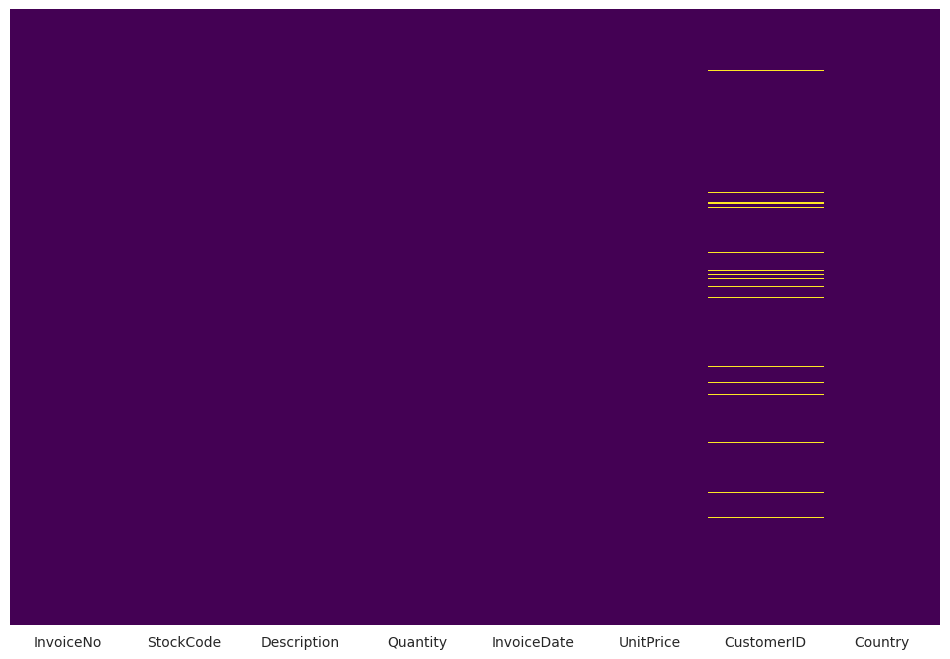

In [7]:
#Let's visualize the null values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap="viridis");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46341 entries, 0 to 46430
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    46341 non-null  object        
 1   StockCode    46341 non-null  object        
 2   Description  46341 non-null  object        
 3   Quantity     46341 non-null  int64         
 4   InvoiceDate  46341 non-null  datetime64[ns]
 5   UnitPrice    46341 non-null  float64       
 6   CustomerID   44876 non-null  float64       
 7   Country      46341 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.2+ MB


In [9]:
df.dropna(inplace=True)

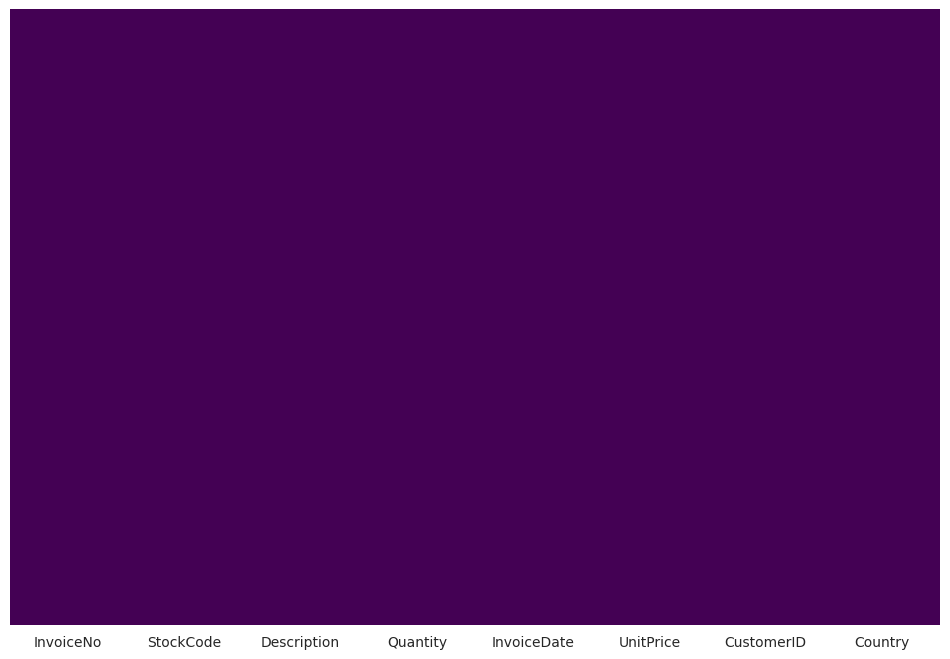

In [10]:
#Let's visualize the null values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap="viridis");

In [12]:
df['Total amount'] = df['Quantity']*df['UnitPrice']

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total amount
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6


In [21]:
df.groupby(by='Description', as_index=False)['Total amount'].sum().sort_values(['Total amount'],ascending=False)

,Description,Total amount
1927,POSTAGE,67464.21
2045,REGENCY CAKESTAND 3 TIER,29696.55
1947,RABBIT NIGHT LIGHT,28767.47
2135,ROUND SNACK BOXES SET OF4 WOODLAND,17995.75
2486,SPACEBOY LUNCH BOX,14441.55
...,...,...
258,BLACK DIAMANTE EXPANDABLE RING,-17.00
2810,WOODEN BOX ADVENT CALENDAR,-17.90
2230,SET OF 3 BABUSHKA STACKING TINS,-25.50
780,Discount,-667.24


In [19]:
df.groupby(by='Country', as_index=False)['Total amount'].sum().sort_values(['Total amount'],ascending=False)

,Country,Total amount
23,Netherlands,284661.54
10,EIRE,250001.78
14,Germany,221509.47
13,France,196626.05
0,Australia,137009.77
32,Switzerland,55739.40
30,Spain,54756.03
3,Belgium,40910.96
31,Sweden,36585.41
19,Japan,35340.62
